<a href="https://colab.research.google.com/github/JNZhao2/classification-2022/blob/main/mushroom_classification_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Setting:**<br>
A mushroom is the fleshy, spore-carrying sporocarp of a fungus. Mushrooms widely spread throughout the world, typically grow on the ground, soil, or anywhere with their food sources. There are more than 14,000 known species of mushrooms at present, some of them share very similar characteristics, while some have distinctive shapes and sizes. Since many mushroom species produce secondary metabolites that can be toxic after ingestion, it is crucial for people to distinguish the poisonous mushrooms from the edible ones. 
Mushroom poisoning is one of the major safety issues in many countries in the world, although most of the cases cause no or only minor harm, there are still a number of mushroom poisonings that result in major harm or fatalities occurring each year.


**Problem Definition:**<br>
The purpose of the project is to learn if poisonous and edible mushrooms can be classified according to their physical characteristics such as shape, color, and size. Through the process of analysis, it can be seen whether there is any single factor that determines the edibility.

**Data Sources:** https://archive.ics.uci.edu/ml/datasets/Mushroom<br>
The dataset has been taken from UC Irvine Machine Learning Repository, and the original mushroom records were drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf. 

In [1]:
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("mushrooms.csv") 
df.head()

Saving mushrooms.csv to mushrooms.csv


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##Data exploration and visualization

In [4]:
#Data exploration
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Data Description:**<br>
The dataset contains 22 input variables, one response, and 8124 observations. The outcome variable is whether the species is being identified as edible or poisonous. All the input variables are nominal variables and each of them describes a feature of the sample. There are no missing values in the data.

**Data understanding:**<br>
The 22 attributes are all categorical variables, each of which describes a physical characteristic of the mushroom sample. Five out of the 22 input variables are binary, for example, the stalk shape of the mushrooms can be either enlarging or tapering. There are 16 out of the 22  input variables containing more than two unique possible values, and we can transform all the categorical variables in the dataset into numerical variables. For example, the veil-color of the mushroom can be either brown (n), orange (o), white (w), or yellow (y), thus that attribute can be converted into four numerical labels: brown - 0; orange - 1; white - 2; yellow - 3. 

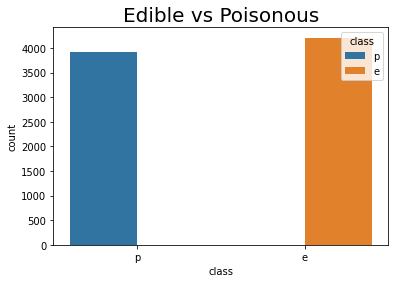

In [8]:
#Data visualization
#Count of Edible and Poisonous mushrooms
plot = sns.countplot(data=df, x='class',hue='class') #reponse variable
plt.title('Edible vs Poisonous' ,fontsize=20)
plt.show() 

**Data Visualization:**<br>
The response variable of the dataset focuses on whether the mushroom species can be eaten or not. In the count plot above, blue means poisonous (p) and orange means edible (e). It can be seen that the two classes are present in similar proportions. 

In [9]:
#Determining unique value
df['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [10]:
df['veil-type'].unique()

array(['p'], dtype=object)

In [11]:
df['gill-attachment'].unique()

array(['f', 'a'], dtype=object)

In [12]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

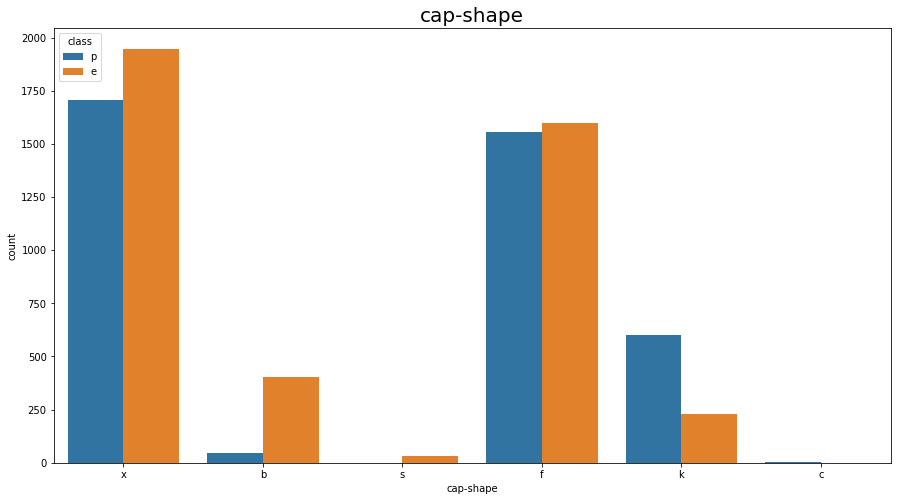

In [22]:
#Count of Mushroom cap-shape
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='cap-shape',hue='class')  
plt.title('cap-shape' ,fontsize=20)
plt.show()     

Mushroom caps come in many different shapes. The count plot above shows the distribution of the shape of the mushroom caps in the data. Blue means poisonous, orange means edible. Convex, flat, and knobbed represent the vast majority of the data in this section and are distributed in poisonous and edible.

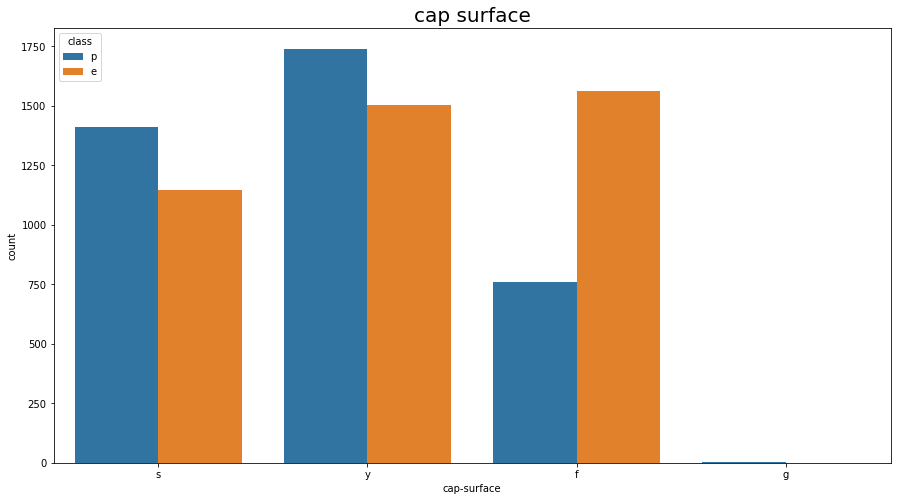

In [14]:
#Count of Mushroom caps-surface
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='cap-surface',hue='class') 
plt.title('cap surface' ,fontsize=20)
plt.show() 

Only four cap-surfaces were recorded in this dataset, and mushrooms with grooves surfaces are rare. Also see that the other three mushroom surfaces contain both poisonous and edible, grooves surfaces are only poisonous.

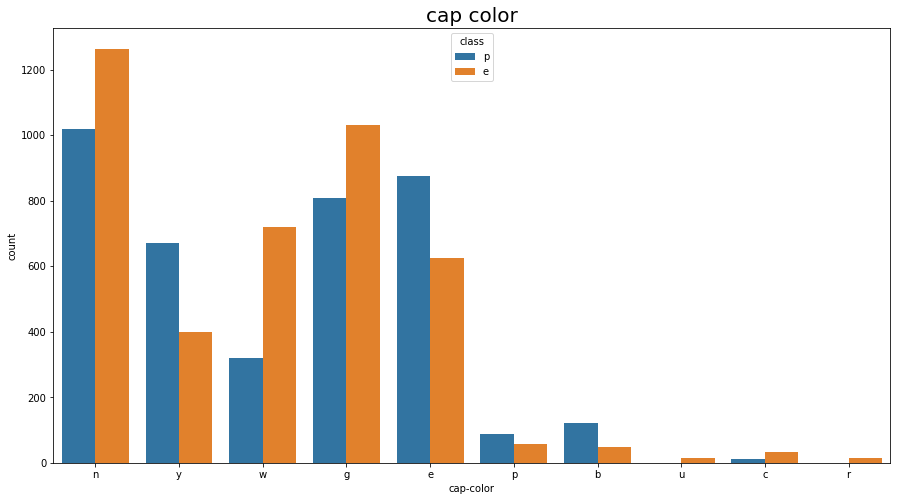

In [15]:
#Count of  Mushroom cap-color
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='cap-color',hue='class') 
plt.title('cap color' ,fontsize=20)
plt.show()

The cap-color records the ten colors of the mushroom cap, in the count plot above we can clearly see that although samples with green and purple color mushroom caps are rare, they are all poisonous. Pink and buff poisonous mushrooms greatly outnumber edible ones. Most of the mushrooms that can be eaten are brown, white and gray in color.

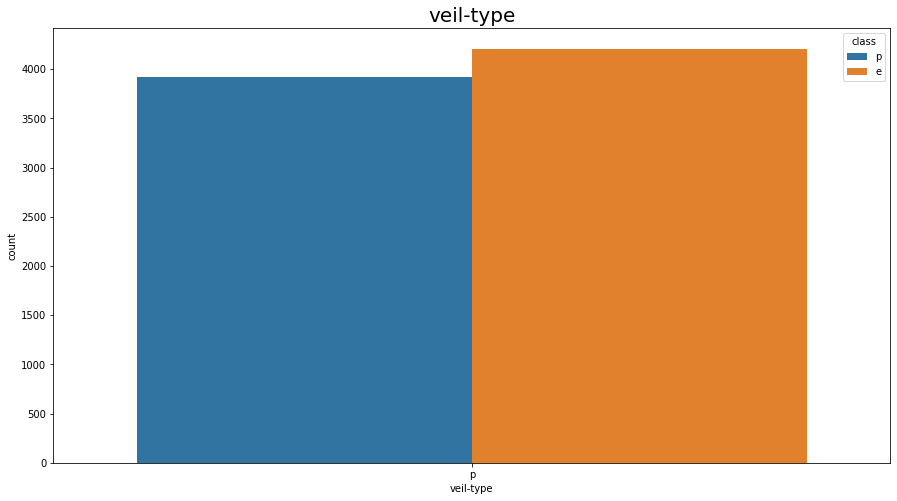

In [16]:
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='veil-type',hue='class') 
plt.title('veil-type' ,fontsize=20)
plt.show()

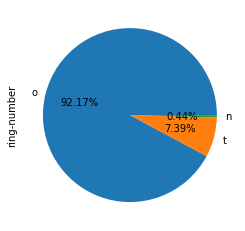

In [17]:
#Percentage of ring-number of mushroom
df['ring-number'].value_counts().plot(kind='pie', autopct='%.2f%%')

The pie chart above shows the distribution of the number of the rings on a mushroom. It can be seen that 92.17% of mushrooms have only one ring, which counts as the majority group of this attribute. About 7.39% of mushrooms have two rings, and the rest 0.44% of the mushrooms do not have any rings. 

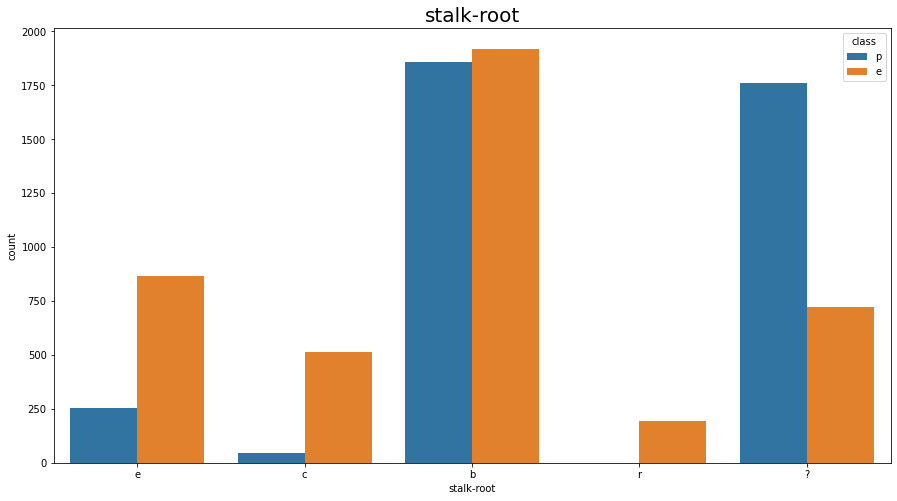

In [18]:
#stalk-root
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='stalk-root',hue='class') 
plt.title('stalk-root' ,fontsize=20)
plt.show()

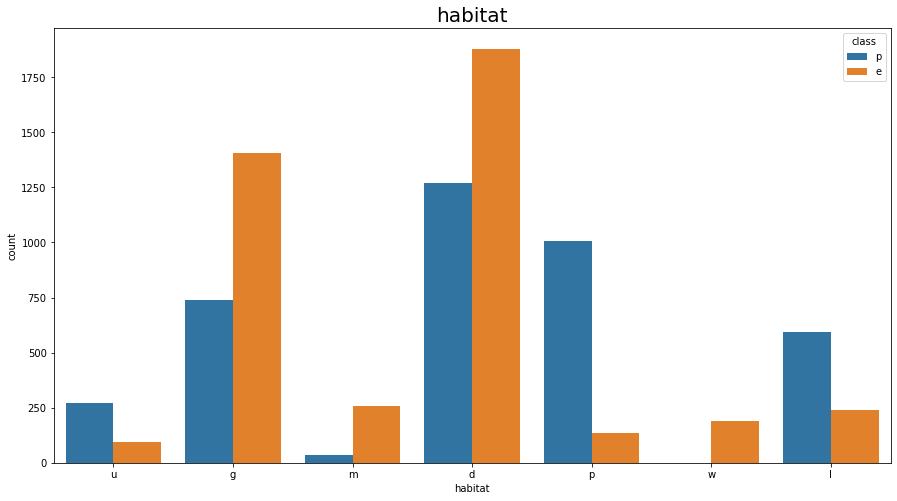

In [19]:
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='habitat',hue='class') 
plt.title('habitat' ,fontsize=20)
plt.show() 

**Data Processing:**<br>
Because the 23 variables of this data are all categorical variables, which are not good for analysis in subsequent work, we coded the categorical variables as numerical variables. The table below shows the dataframe after encoding. After that we can use the heat map to see the relationship between the data.

In [20]:
from sklearn import preprocessing
#encoder the data from categorical variable to numrical variable
le = preprocessing.LabelEncoder()
df1 =df.apply(le.fit_transform)
df1
#p=1, e =0

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


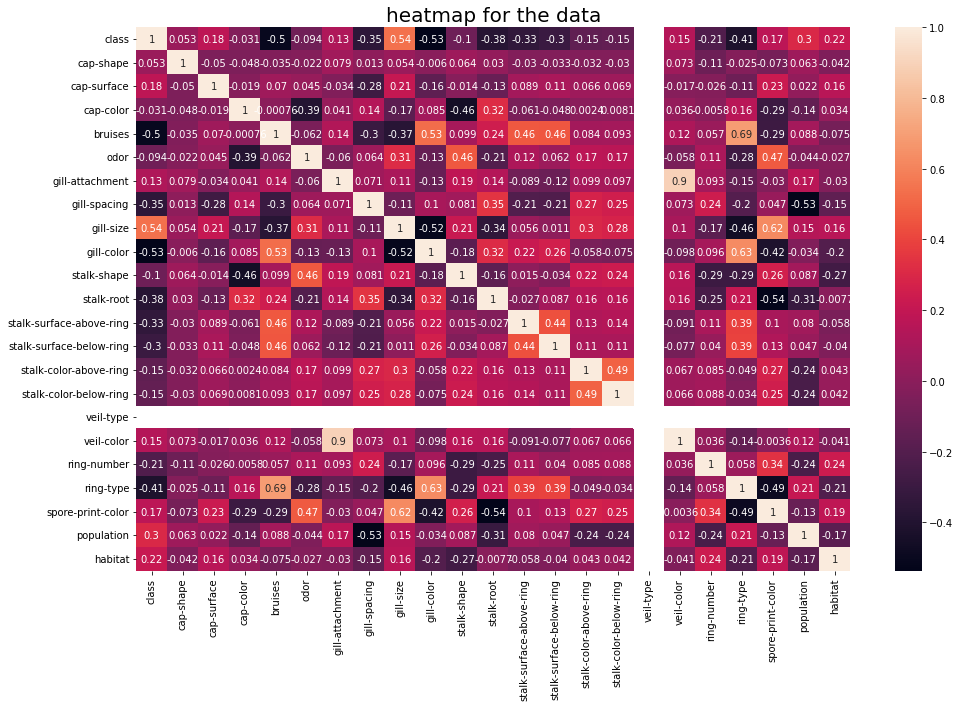

In [23]:
#corr for heatmap
corr = df1.corr()
plt.figure(figsize=(16,10)) 
ax = sns.heatmap(data = corr, annot = True)
plt.title('heatmap for the data' ,fontsize=20)
plt.show()

The heat map shows that there is no relationship between veil-type and other variables, because all the samples have the same veil-type. In this analysis, we can delete veil-type to reduce the workload.<br>

The correlation between veil-color and gill-attachment is 0.9, which means those two variables contain a lot of overlap in information. It seems that no variables have a very strong negative linear relationship.


**Dimension Reduction:**<br>
All of the 8124 observations share the same veil-type, so that variable is not correlated to the target prediction, and the column of veil-type should be dropped to reduce redundancy. The high correlation coefficient between veil-color and gill-attachment (0.9) indicates the strong positive linear relationship between those two variables, so the column “veil-color” is going to be removed to avoid multicollinearity problems.<br>

After the dimension reduction process, the dataset contains 20 input variables, one response, and 8124 observations.

In [24]:
# dimension reduction
df1 = df1.drop(['veil-type','veil-color'], axis=1)
X = df1.iloc[:,1:21] 
y = df1.iloc[:, 0]

**Data Partition:**<br>
The dataset now includes 20 input variables and one response, each has 8124 observations. The column ‘class’ contains the target variable, and the rest of the columns contain the predictor variables of the model. The dataset is randomly divided into training (75%) and validation (25%) sets. After the data partition process, there are 20 input variables with 6093 records and one response variable with 6093 records in the training sets, while the validation sets contain 20 input variables and one response variable, each with 2031 records.

In [25]:
# data partitioning
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

**Data Mining Models/Methods:**

##KNN

The K-NN  method is to identify k records in the training dataset that are similar to the new records we wish to classify. We then use these similar or neighboring records to classify the new record into a class, assigning the new record to the major class of these neighbors. We look for records in the training data that are similar or "close" to the records that we want to classify in the prediction space. Then, we assign a class to the records we want to classify based on the classes to which those close records belong.<br>

Advantage:
1. Training time complexity is relatively low compared to some algorithms.
2. No assumptions on the distribution of the data; high accuracy.
3. Since the KNN method mainly relies on the limited number of neighboring samples around, rather than the discriminative class domain to determine the class, so for the set of samples to be classified with more intersection or overlap of class domains, the KNN method is more suitable than other methods.<br>

Disadvantage:
1. The choice of K is not fixed.
2. The prediction results are easily affected by the data containing noise.
3. When the samples are unbalanced, the categories of the new samples are biased toward the categories with superior numbers in the training samples, which easily leads to prediction errors.

Implementation:<br> 
Twenty nearest neighbor iterations (k=20) were run using the k-NN classifier. An additional parameter was used in each iteration to obtain the best value of k.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pylab as plt

In [27]:
results = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  results.append({'k': k,'accuracy': accuracy_score(y_valid, knn.predict(X_valid))})
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.999508
1    2  0.998031
2    3  0.998031
3    4  0.997046
4    5  0.997538
5    6  0.996061
6    7  0.996061
7    8  0.995569
8    9  0.996061
9   10  0.995569
10  11  0.995569
11  12  0.994584
12  13  0.995076
13  14  0.992614
14  15  0.994092
15  16  0.992122
16  17  0.993107
17  18  0.990645
18  19  0.991137
19  20  0.990153


In [28]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_valid)
print('RandomForestClassifier Accuracy is: {}'.format(knn.score(X_valid,y_valid)))

RandomForestClassifier Accuracy is: 0.9960610536681438


In [29]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_predknn)))
y_pred_train_knn = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_knn)))
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_valid, y_valid)))

Model accuracy score: 0.9961
Training-set accuracy score: 0.9990
Training set score: 0.9990
Test set score: 0.9961


In [30]:
from sklearn.metrics import roc_curve, auc

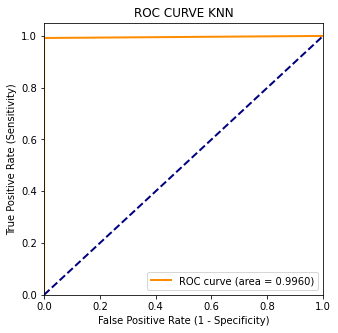

In [31]:
fpr,tpr,_= roc_curve(y_valid, y_predknn)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predknn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1020
           1       1.00      0.99      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



After running 20 nearest neighbor iterations with the k-NN classifier, we can see that the accuracy score decreases slowly as the number of iterations increases. However, the accuracy score is above 99% for all 20 iterations. The maximum accuracy score is 99.6% when k is 1. But we can choose a more stable accuracy score of 99.6% when k is 6, 7 and 9. So we can conclude that the best value of k is 6.

##Naive Bayes

The Naive Bayes classifier assumes each attribute in the dataset is independent and has the equal distribution of the outcome. The probability of an observation belonging to a certain class is calculated by multiplying the conditional probabilities together for each feature for a given class value based on Bayes’ Theorem. After having probabilities of the predictors belonging to each class, we can choose the class value with the highest probability and make further predictions.

Advantage:
1. The computation can be done quickly since the model uses a probabilistic approach.
2. Can be implemented without a large training set.
3. Robust to noisy data compared to the Exact Bayes model.

Disadvantage:
1. Fails to record relationships between attributes.
2. It is hard to find features that are all independent like what the model assumes in real life.
3. Needs a large number of records to obtain reliable parameter estimates.

Implementation: <br>
The Multinomial Naive Bayes classifier was executed with a default smoothing parameter of 1.0, resulting in an validation accuracy of 79.4%.


In [37]:
!pip install dmba
from dmba import classificationSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.naive_bayes import MultinomialNB
# instantiate the model
model_nb = MultinomialNB()
# fit the model
model_nb.fit(X_train, y_train)
y_pred_NB = model_nb.predict(X_valid)
# predict probabilities
predProb_train = model_nb.predict_proba(X_train)
predProb_valid = model_nb.predict_proba(X_valid)[:, 1]

In [39]:
from sklearn.metrics import accuracy_score
#accuracy of testing and training sets
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_pred_NB)))
y_pred_train_NB = model_nb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_NB)))

Model accuracy score: 0.7942
Training-set accuracy score: 0.8012


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [41]:
#cm for the the training set
cm_nb_train = confusion_matrix(y_train, y_pred_train_NB)

print('Confusion matrix\n\n', cm_nb_train)
print('Training Accuracy = {:.5f}'.format(accuracy_score(y_train, y_pred_train_NB)))

Confusion matrix

 [[2969  219]
 [ 992 1913]]
Training Accuracy = 0.80125


In [42]:
#classification report for the training set
print(classification_report(y_train, y_pred_train_NB))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      3188
           1       0.90      0.66      0.76      2905

    accuracy                           0.80      6093
   macro avg       0.82      0.79      0.80      6093
weighted avg       0.82      0.80      0.80      6093



Text(33.0, 0.5, 'Actual')

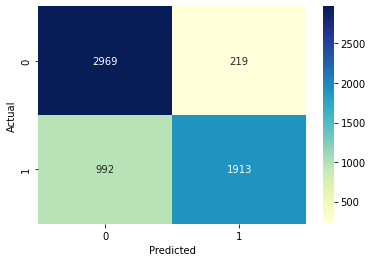

In [43]:
#Visualization for training cm
cm_matrix_train_NB = pd.DataFrame(data=cm_nb_train)
sns.heatmap(cm_matrix_train_NB, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [44]:
#cm for validation set
cm_nb_valid = confusion_matrix(y_valid, y_pred_NB)
test_prob_nb = model_nb.predict_proba(X_valid)[:, 1]

print('Confusion matrix\n\n', cm_nb_valid)
print('Log loss = {:.5f}'.format(log_loss(y_valid, test_prob_nb)))
print('AUC = {:.5f}'.format(roc_auc_score(y_valid, test_prob_nb)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_valid, test_prob_nb)))

Confusion matrix

 [[940  80]
 [338 673]]
Log loss = 0.63461
AUC = 0.89189
Average Precision = 0.90554


In [45]:
#measurements for the testing set 
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_valid, y_pred_NB)))
print('Precision = {:.5f}'.format(precision_score(y_valid, y_pred_NB)))
print('Recall = {:.5f}'.format(recall_score(y_valid, y_pred_NB)))
print('F1 score = {:.5f}'.format(f1_score(y_valid, y_pred_NB)))

print('\nClassification Report')
print(classification_report(y_valid, y_pred_NB))


Using 0.5 as threshold:
Accuracy = 0.79419
Precision = 0.89376
Recall = 0.66568
F1 score = 0.76304

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1020
           1       0.89      0.67      0.76      1011

    accuracy                           0.79      2031
   macro avg       0.81      0.79      0.79      2031
weighted avg       0.81      0.79      0.79      2031



Text(33.0, 0.5, 'Actual')

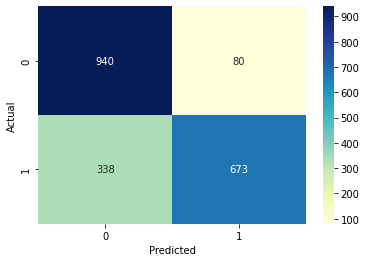

In [46]:
#Visualization for testing cm
cm_matrix_pred_NB = pd.DataFrame(data=cm_nb_valid)
sns.heatmap(cm_matrix_pred_NB, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

The predictive performance of the Naive Bayes model can be seen in the confusion matrix. The model has a validation accuracy of 79.4% and a training accuracy of 80.1%, which means the model is not overfitting and is able to get 79.4% of the predictions right with new data. The precision of the model is 89.1%, and the recall of the model is 66.6%, meaning that the model does not predict many observations as class of interest, but most of what it predicts as class of interest is correct (a low FP but a high FN). On the other hand, many observations actually in the class of interest are missed.<br>

The F1 score of the model is 0.76, which gives a harmonic mean of precision and recall, and we can decide if one of them is more important in future studies. 

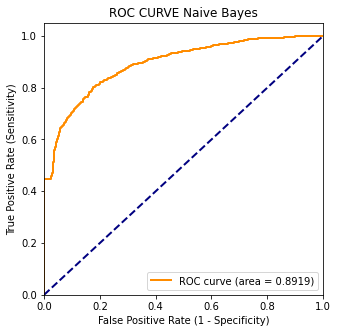

In [47]:
#ROC Curve for the Naive Bayes model
fpr, tpr,_ = roc_curve(y_valid, predProb_valid)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC CURVE Naive Bayes')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

The area under the ROC Curve is 0.89, which visualizes the model’s ability to discriminate between classes on the new data.

##Logistic Regression

The logistic regression model can be used for datasets with a categorical outcome variable, and the observations will be assigned to discrete sets of classes. The logistic regression model is based on the concept of probability, and will return a probability value that the observation belongs to a certain class. 

Advantage:
1. Easy to implement, and more efficient in training than many complex algorithms. 
2. Does not make assumptions about distributions of class data in feature space.
3. Performs well on datasets with independent variables that are linearly separable. 

Disadvantage:
1. Likely to lead to overfit if the number of predictors is more than the number of observations in a dataset.
2. Should not be used on non-linear problems, because the model has a linear decision boundary.
3. Does not work well in the presence of multicollinearity. 

Implementation: <br> 
A logistic regression model without penalty is applied to the dataset, and the validation accuracy is  94.9%.


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
#fit the model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
#prediction
y_pred_lr = model_lr.predict(X_valid)
test_prob = model_lr.predict_proba(X_valid)[:, 1]  # P(target = 1)

In [51]:
#training accuracy
y_pred_lr_train = model_lr.predict(X_train)
print('Training Accuracy = {:.5f}'.format(accuracy_score(y_train, y_pred_lr_train)))

Training Accuracy = 0.94272


In [56]:
#measurements for the testing set
print('Log loss = {:.5f}'.format(log_loss(y_valid, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_valid, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_valid, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_valid, y_pred_lr)))
print('Precision = {:.5f}'.format(precision_score(y_valid, y_pred_lr)))
print('Recall = {:.5f}'.format(recall_score(y_valid, y_pred_lr)))
print('F1 score = {:.5f}'.format(f1_score(y_valid, y_pred_lr)))

print('\nClassification Report')
print(classification_report(y_valid, y_pred_lr))

Log loss = 0.17559
AUC = 0.98013
Average Precision = 0.97950

Using 0.5 as threshold:
Accuracy = 0.94879
Precision = 0.95947
Recall = 0.93670
F1 score = 0.94795

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1020
           1       0.96      0.94      0.95      1011

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [57]:
#cm for the testing set
cm_lr = confusion_matrix(y_valid, y_pred_lr)

print('Confusion matrix\n\n', cm_lr)

Confusion matrix

 [[980  40]
 [ 64 947]]


Text(33.0, 0.5, 'Actual')

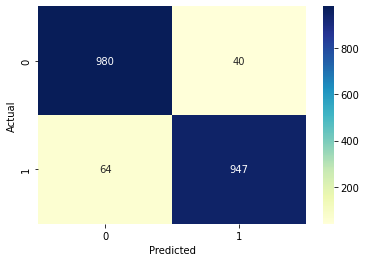

In [58]:
cm_matrix_lr = pd.DataFrame(data=cm_lr)
sns.heatmap(cm_matrix_lr, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

We tried to use a logistic regression model to fit the dataset. The model has a training accuracy of 94.3%, and a validation accuracy of 94.9%, the slightly lower in the training accuracy may be caused by the random data partitioning process. It can be seen that the model is not overfitting and gives good predictions. The precision of 95.9% indicates the high ratio of correct positive predictions to the total predicted positives. The recall of  93.7% means the high ratio of correct positive predictions to the total actual positive observations. <br>

The F1 score of 0.95 implies low false negatives and low false positives in the model, meaning that the model performs accurately on new data.

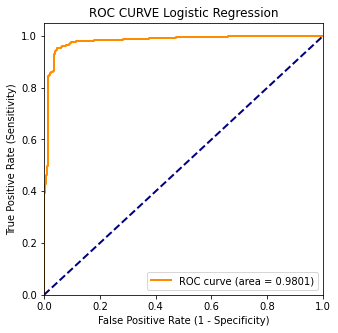

In [59]:
# ROC Curve for the logistic regression model
fpr,tpr,_= roc_curve(y_valid, test_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

The ROC curve is close to the top-left corner, and the area under the ROC Curve is 0.98, meaning that the model discriminates between classes well on the new data. 

##Random Forest

A random forest is a method in which many decision trees are integrated and used to predict the final outcome. In 2001, Breiman combined classification trees into a random forest by randomizing the use of variables (columns) and data (rows) to generate many classification trees, and then aggregated the results of the classification trees.

Advantage:
1. Being able to handle very high-dimensional data and not having to do feature selection, since the feature subset is chosen randomly.
2. The ability to derive feature importance after training.
3. Insensitive to missing values, and can still maintain accuracy if a large portion of the features are missing.

Disadvantage:
1. Random forests can overfit on certain noisy classification or regression problems.
2. For data with attributes with different values, attributes with more value divisions will have a greater impact on the random forest.

Implementation:<br> 
By using RandomForestClassifier to determine the feature importance, the feature importance values are collected to get better accuracy in fitting the RandomForestClassifier model.


In [60]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [61]:
RFC = RandomForestClassifier(max_depth=4,max_features=20, random_state=1)
RFC.fit(X_train, y_train)
y_predrfc = RFC.predict(X_valid)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_valid,y_valid)))

RandomForestClassifier Accuracy is: 0.982274741506647


In [62]:
results = []
for m in range(1, 20):
  RFC = RandomForestClassifier(max_depth=m,max_features=20).fit(X_train,y_train)
  results.append({'m': m,'accuracy': accuracy_score(y_valid, RFC.predict(X_valid))})
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     m  accuracy
0    1  0.790251
1    2  0.914820
2    3  0.967996
3    4  0.982275
4    5  0.994092
5    6  0.995076
6    7  1.000000
7    8  1.000000
8    9  1.000000
9   10  1.000000
10  11  1.000000
11  12  1.000000
12  13  1.000000
13  14  1.000000
14  15  1.000000
15  16  1.000000
16  17  1.000000
17  18  1.000000
18  19  1.000000


Determining feature importance in the Random Forest model shows us each feature. Since there are only 20 features in data X, we set max_features=20. To prevent overfitting, we need to find max_depth which is the maximum number of levels in each decision tree. By running the code we find max_depth equals to 6, which is the maximum m before the accuracy gets 1.0, and the accuracy is 0.995.

                     feature  importance       std
0                  cap-shape    0.000552  0.003496
5            gill-attachment    0.002671  0.013299
1                cap-surface    0.003355  0.012897
2                  cap-color    0.004246  0.011148
15               ring-number    0.009122  0.030686
13    stalk-color-above-ring    0.010371  0.036248
9                stalk-shape    0.011283  0.034256
14    stalk-color-below-ring    0.013452  0.039077
19                   habitat    0.014565  0.034590
18                population    0.054008  0.108886
12  stalk-surface-below-ring    0.054553  0.103626
6               gill-spacing    0.061099  0.116827
3                    bruises    0.062461  0.140352
10                stalk-root    0.070435  0.100810
11  stalk-surface-above-ring    0.071977  0.144929
17         spore-print-color    0.073234  0.139487
16                 ring-type    0.087654  0.158451
7                  gill-size    0.098682  0.156407
4                       odor   

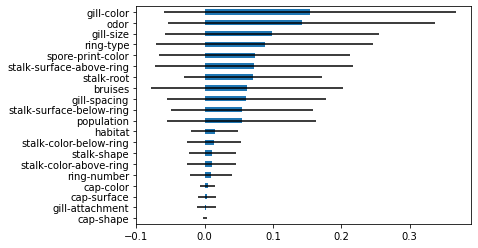

In [63]:
rf = RandomForestClassifier(max_depth=3, random_state=1)
rf.fit(X_train, y_train)
# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()

In [64]:
RFC = RandomForestClassifier(max_depth=3,max_features=20, random_state=1)
RFC.fit(X_train, y_train)
y_predrfc = RFC.predict(X_valid)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_valid,y_valid)))

RandomForestClassifier Accuracy is: 0.9679960610536681


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_predrfc))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1020
           1       0.96      0.97      0.97      1011

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



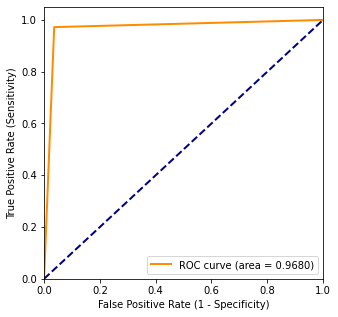

In [66]:
fpr, tpr,_ = roc_curve(y_valid, y_predrfc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

**Project Results:**

In [67]:
models = {'models': ['k-NN','Naive Bayes', 'Logistic Regression', 'Random Forest'],
        'Accuracy': [accuracy_score(y_valid, y_predknn),accuracy_score(y_valid, y_pred_NB),accuracy_score(y_valid, y_pred_lr),RFC.score(X_valid,y_valid)],
         'Precision':[precision_score(y_valid, y_predknn),precision_score(y_valid, y_pred_NB),precision_score(y_valid, y_pred_lr),precision_score(y_valid, y_predrfc)],
          'Recall': [recall_score(y_valid, y_predknn),recall_score(y_valid, y_pred_NB),recall_score(y_valid, y_pred_lr),recall_score(y_valid, y_predrfc)]}
df_performance = pd.DataFrame(models)
pd.set_option('precision', 3)
df_performance

,models,Accuracy,Precision,Recall
0,k-NN,0.996,1.000,0.992
1,Naive Bayes,0.794,0.894,0.666
2,Logistic Regression,0.949,0.959,0.937
3,Random Forest,0.968,0.964,0.972


Since we are dealing with a classification problem, the performance of the models will be evaluated by the accuracy, precision, and recall. It can be seen that the k-NN model has the highest accuracy, precision, and recall. We choose k to be 6 to obtain a stable performance, and when k is at 6, the k-NN model is able to make correct predictions 99.6% of the time. The high precision indicates that of all the positive predictions, almost all of them are really positive, and recall means of all actual positive samples, 99.1% are being correctly predicted as positive. Overall, the k-NN model is the best model among the other models in making correct predictions.  

**Impact of the Project Outcomes:**<br>
The goal of this project is to find a model that could classify edible mushrooms from the poisonous ones by their physical characteristics. Mushroom poisoning is still one of the serious safety issues that cause statistics of major harm or fatalities each year, so to develop a model with precise predictions will be beneficial to the whole society. <br>

The database we used is focused on gilled mushrooms in the Agaricus and Lepiota Family, and we found that no single factors could be used to determine the edibility of the mushroom alone. Among the models we used, the k-NN model, the logistic regression model, and the random forest model all perform well in predicting. In real-world studies, it is possible that there will be an asymmetric cost structure, for example, the cost of misclassifying a poisonous mushroom as edible may be more than the cost of misclassifying an edible mushroom as poison, and the model performance could be reevaluated based on that.


**Reference:**<br>
Schlimmer , J. (n.d.). Mushroom data set. UCI Machine Learning Repository: Mushroom data set. Retrieved December 2, 2022, from https://archive.ics.uci.edu/ml/datasets/Mushroom 
<br>
Garziano, G. (n.d.). Mushrooms classification – part 1. DataScience+. Retrieved December 2, 2022, from https://datascienceplus.com/mushrooms-classification-part-1/
